**<center> Projet : Natural Language Processing avec Python <center>**

**Dataset**: Hate Speech and Offensive Language Dataset (research hate-speech detection)

**Liens**: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data

Le texte est classé (dans la colonne 'class') comme :

*   0 - hate-speech (discours haineux)

*   1 - offensive language (langage offensant)

*   2 - neither (ni l'un ni l'autre)

# 1. Chargement et exploration des données

## a. Chargement

In [184]:
# Importer les bibliothèques nécessaires
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [185]:
# Télécharger le jeu de données
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

In [186]:
# Lister les fichiers téléchargés
print("Fichiers dans le jeu de données :", os.listdir(path))

Fichiers dans le jeu de données : ['labeled_data.csv']


In [187]:
# Chargement des données
csv_file = os.path.join(path, "labeled_data.csv")
df = pd.read_csv(csv_file)

## b. Analyser la distribution des classes

In [188]:
# Aperçu des données
print("Aperçu des données :")
df

Aperçu des données :


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [189]:
# Afficher les informations sur les colonnes du jeu de données
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None
         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000   

In [190]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values)


Valeurs manquantes par colonne :
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [191]:
# Suppression de la colonne "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [192]:
# Ajout de la colonne 'class_text' pour mapper les classes à des labels textuels
class_mapping = {0: 'hate-speech', 1: 'offensive language', 2: 'neither'}
df['class_text'] = df['class'].map(class_mapping)

In [193]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,class_text
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language


In [194]:
# Répartition des classes
sentiment= df['class_text'].value_counts()
print("\nRépartition des classes :")
print(sentiment)


Répartition des classes :
class_text
offensive language    19190
neither                4163
hate-speech            1430
Name: count, dtype: int64


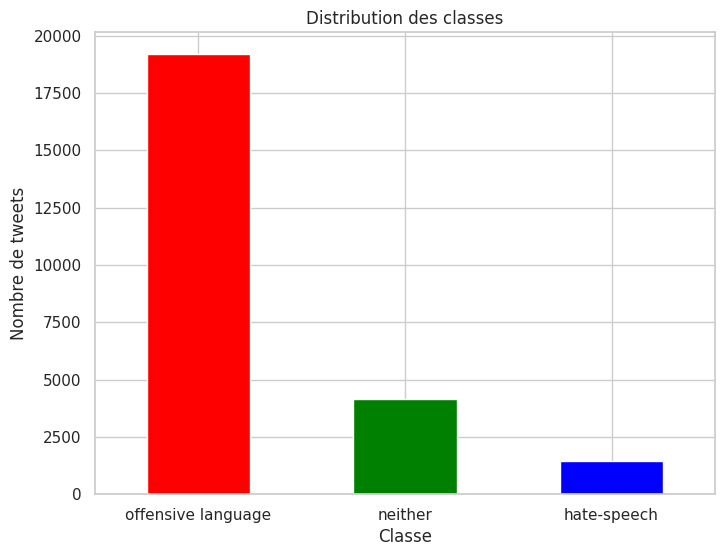

In [195]:
# Analyse de la distribution des classes
plt.figure(figsize=(8, 6))
sentiment.rename(index= class_mapping).plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre de tweets')
plt.xticks(rotation=0)
plt.show()

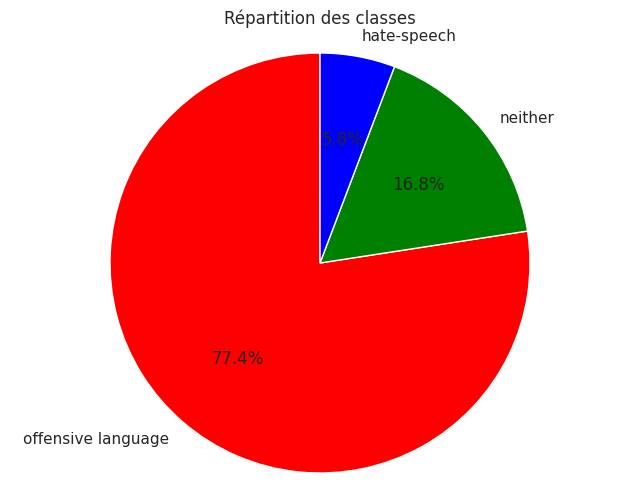

In [196]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment, labels=sentiment.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title("Répartition des classes")
plt.axis('equal')
plt.show()

## c. Analyser les caractéristiques textuelles du dataset

In [262]:
# Longueur moyenne des tweets
df['tweet_length'] = df['tweet'].apply(len)
print(f"Longueur moyenne des tweets : {df['tweet_length'].mean():.2f}")

Longueur moyenne des tweets : 85.44


In [198]:
# Fréquence des mots et hashtags les plus utilisés
from collections import Counter
import re

In [199]:
# Extraire les mots et hashtags
def extract_words_hashtags(tweets):
    words = []
    hashtags = []
    for tweet in tweets:
        words.extend(re.findall(r'\b\w+\b', tweet))
        hashtags.extend(re.findall(r'#\w+', tweet))
    return words, hashtags

words, hashtags = extract_words_hashtags(df['tweet'])

In [200]:
# Compter les mots et hashtags les plus fréquents
word_freq = Counter(words)
hashtag_freq = Counter(hashtags)

In [201]:
# Afficher les 10 mots et hashtags les plus fréquents
print(f"Mots les plus fréquents : {word_freq.most_common(10)}")
print(f"Hashtags les plus fréquents : {hashtag_freq.most_common(10)}")

Mots les plus fréquents : [('a', 9168), ('I', 8791), ('bitch', 8215), ('RT', 7614), ('t', 6904), ('the', 6645), ('you', 5812), ('to', 5284), ('and', 3720), ('that', 3583)]
Hashtags les plus fréquents : [('#128514', 3241), ('#8220', 1726), ('#8221', 1682), ('#8230', 1265), ('#128557', 616), ('#128553', 368), ('#128175', 311), ('#8217', 283), ('#65039', 273), ('#128530', 264)]


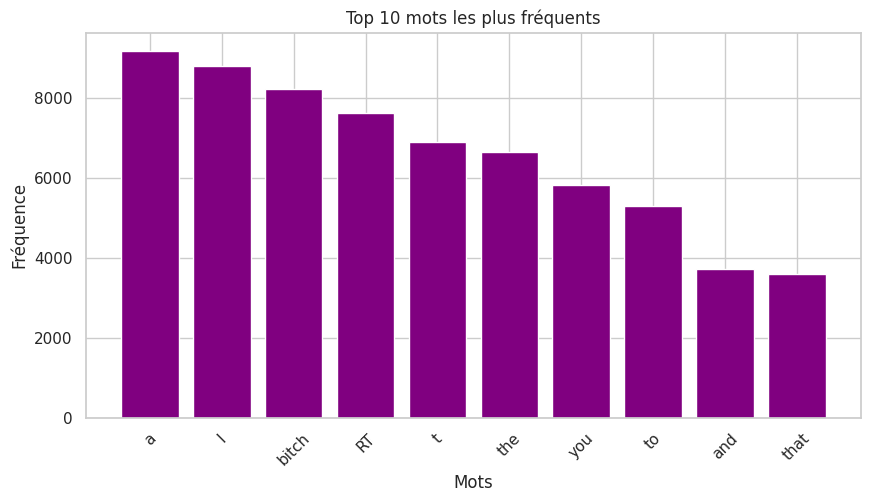

In [202]:
# Afficher les 10 mots les plus fréquents
plt.figure(figsize=(10, 5))
words, counts = zip(*word_freq.most_common(10))
plt.bar(words, counts, color='purple')
plt.title('Top 10 mots les plus fréquents')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

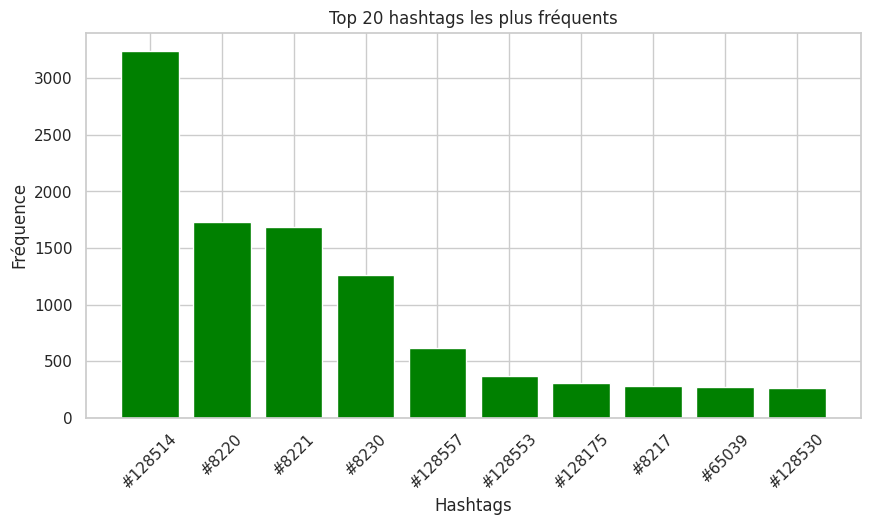

In [203]:
# Afficher les 10 hashtags les plus fréquents
plt.figure(figsize=(10, 5))
hashtags, counts = zip(*hashtag_freq.most_common(10))
plt.bar(hashtags, counts, color='green')
plt.title('Top 20 hashtags les plus fréquents')
plt.xlabel('Hashtags')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

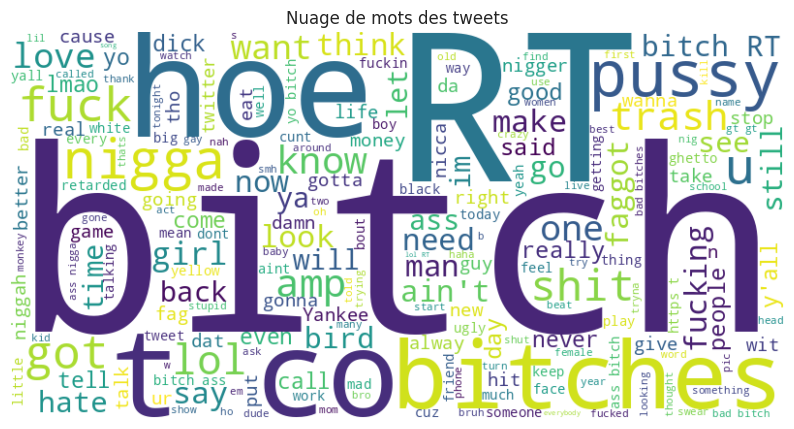

In [204]:
# Nuage de mots des tweets
all_words = ' '.join(df['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des tweets")
plt.show()

# 2. Prétraitement des données

In [205]:
# Importer les bibliothèques nécessaires
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [206]:
# Télécharger les ressources NLTK nécessaires
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## a. Nettoyer les tweets & Gérer la tokenisation des tweets et appliquer des techniques

In [207]:
# Fonction de nettoyage du texte
def preprocess_text(text, method="lemmatization"):

    # Mise en minuscule
    text = text.lower()
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Suppression des stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming ou Lemmatization
    if method == "stemming":
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == "lemmatization":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstruction du texte
    return ' '.join(tokens)

In [208]:
# Prétraiter
df['cleaned_tweet'] = df['tweet'].apply(lambda x: preprocess_text(str(x), method="lemmatization"))

In [209]:
# Aperçu des données nettoyées
print("\nAperçu des données nettoyées :")
df[['tweet', 'cleaned_tweet','class_text']]


Aperçu des données nettoyées :


,tweet,cleaned_tweet,class_text
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat coldtyga dwn bad cuffin dat h...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased look like tranny,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...,offensive language
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthafin lie lifeasking pearl coreyemanue...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...,neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...,offensive language
24781,youu got wild bitches tellin you lies,youu got wild bitch tellin lie,offensive language


## b. Représenter les tweets sous forme de vecteurs

- TF-IDF

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
# Représentation TF-IDF
vectorizer_tf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer_tf.fit_transform(X_train)

In [212]:
print(X_train_tfidf.shape)

(19826, 5000)


- Word2Vec

In [213]:
from gensim.models import Word2Vec

In [214]:
# Tokeniser les tweets
df['tokenized_tweet'] = df['cleaned_tweet'].apply(lambda x: x.split())

In [215]:
# Entraîner le modèle Word2Vec
model_wv = Word2Vec(sentences=df['tokenized_tweet'], vector_size=100, window=5, min_count=1, workers=4)

In [216]:
# Fonction pour représenter
def tweet_vector(tokens, model, vector_size):
    # Récupérer les vecteurs des mots présents dans le modèle
    word_vectors = [model_wv.wv[word] for word in tokens if word in model_wv.wv]
    # Si aucun mot du tweet n'est dans le modèle, retourner un vecteur nul
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    # Calculer la moyenne des vecteurs des mots
    tweet_vector = np.mean(word_vectors, axis=0)
    return tweet_vector

In [217]:
# Appliquer la fonction à tous les tweets
vector_size = 100
df['tweet_vector'] = df['tokenized_tweet'].apply(lambda x: tweet_vector(x, model_wv, vector_size))

In [218]:
# Afficher les premières lignes
df[['cleaned_tweet', 'tokenized_tweet', 'tweet_vector']].head()

,cleaned_tweet,tokenized_tweet,tweet_vector
0,rt mayasolovely woman shouldnt complain cleani...,"[rt, mayasolovely, woman, shouldnt, complain, ...","[-0.20587885, 0.5363635, 0.09346545, 0.0306097..."
1,rt mleew boy dat coldtyga dwn bad cuffin dat h...,"[rt, mleew, boy, dat, coldtyga, dwn, bad, cuff...","[-0.15696634, 0.4213213, 0.04208236, 0.0383602..."
2,rt urkindofbrand dawg rt sbabylife ever fuck b...,"[rt, urkindofbrand, dawg, rt, sbabylife, ever,...","[-0.19579804, 0.49678028, 0.056813, 0.04883325..."
3,rt cganderson vivabased look like tranny,"[rt, cganderson, vivabased, look, like, tranny]","[-0.1670504, 0.47615704, 0.07479624, 0.0135495..."
4,rt shenikaroberts shit hear might true might f...,"[rt, shenikaroberts, shit, hear, might, true, ...","[-0.18367237, 0.4642947, 0.060886014, 0.042905..."


# 3.	Modélisation

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling2D, Conv1D, MaxPooling1D

In [220]:
# Exemple de données d'entrée
X = df['tweet'].values
y = df['class'].values

In [221]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
print(f"Forme des données d'entraînement : {X_train.shape}")
print(f"Forme des données de test : {X_test.shape}")

Forme des données d'entraînement : (19826,)
Forme des données de test : (4957,)


In [223]:
# S'assurer que les données sont sous forme de texte brut
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [224]:
# Transformation des données d'entraînement et de test
X_test_tfidf = vectorizer_tf.transform(X_test)

In [225]:
# Fonction pour afficher les métriques
def print_metrics(y_test, y_pred, model_name):
    print(f"Métrique pour {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}\n")

## a. Support Vector Machine (SVM)


In [227]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
y_proba_svm = svm_model.predict_proba(X_test_tfidf)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm, multi_class='ovr')

In [232]:
# Calcul de la courbe ROC et du score AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm[:, 1], pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [233]:
# Afficher les métriques
print("Rapport de classification SVM :")
print(classification_report(y_test, y_pred_svm))
print_metrics(y_test, y_pred_svm, 'SVM')

Rapport de classification SVM :
              precision    recall  f1-score   support

           0       0.54      0.15      0.24       290
           1       0.93      0.96      0.94      3832
           2       0.85      0.90      0.88       835

    accuracy                           0.91      4957
   macro avg       0.77      0.67      0.69      4957
weighted avg       0.89      0.91      0.89      4957

Métrique pour SVM:
Accuracy: 0.9063949969739762
Precision: 0.8909471636836402
Recall: 0.9063949969739762
F1-Score: 0.891796901696874



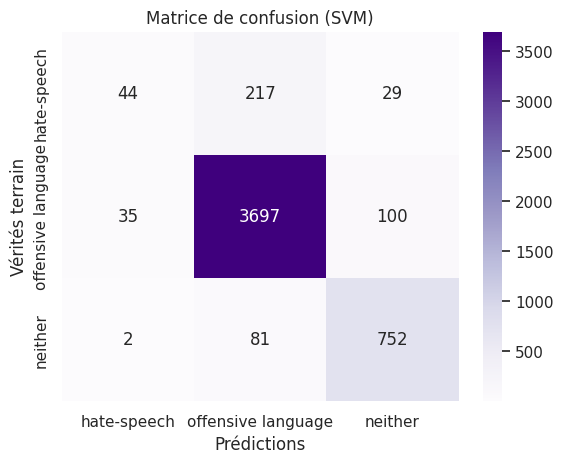

In [255]:
# Matrice de confusion pour SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.title('Matrice de confusion (SVM)')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()

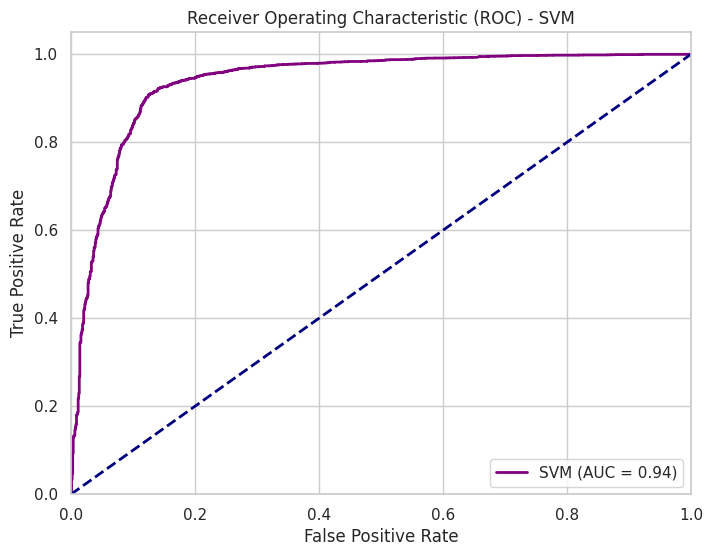

In [256]:
# Tracer la courbe ROC pour SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Caractéristiques de fonctionnement du récepteur (ROC) - SVM')
plt.legend(loc='lower right')
plt.show()

In [263]:
# Affichage du score ROC-AUC
print(f"ROC-AUC pour SVM: {roc_auc_svm}")

ROC-AUC pour SVM: 0.9386864996520529


## b. Logistic Regression

In [237]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
y_proba_lr = lr_model.predict_proba(X_test_tfidf)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr, multi_class='ovr')

In [238]:
# Calcul de la courbe ROC et du score AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:, 1], pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [239]:
print("Rapport de classification par régression logistique :")
print(classification_report(y_test, y_pred_lr))
print_metrics(y_test, y_pred_lr, 'Logistic Regression')

Rapport de classification par régression logistique :
              precision    recall  f1-score   support

           0       0.47      0.16      0.23       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.83      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957

Métrique pour Logistic Regression:
Accuracy: 0.8930804922332055
Precision: 0.8756545956363373
Recall: 0.8930804922332055
F1-Score: 0.879167835137788



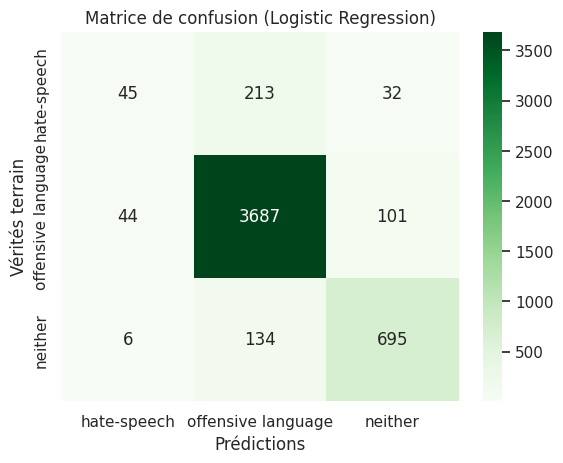

In [240]:
# Matrice de confusion pour Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.title('Matrice de confusion (Logistic Regression)')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()

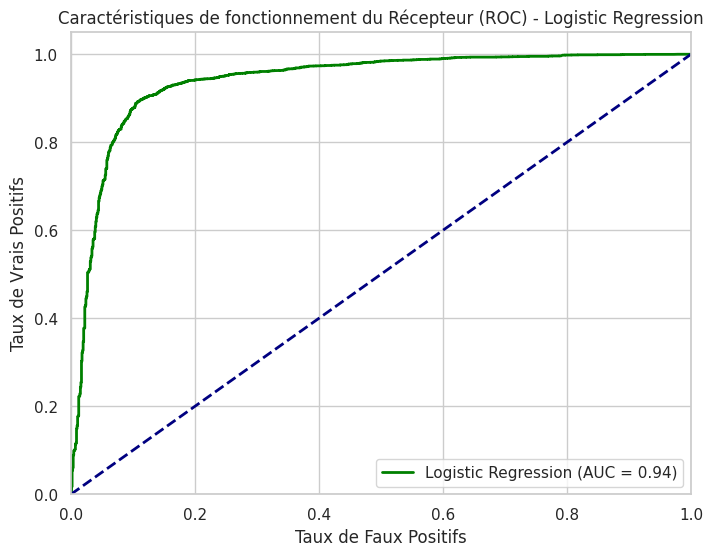

In [257]:
# Tracer la courbe ROC pour Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Caractéristiques de fonctionnement du Récepteur (ROC) - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [258]:
# Affichage du score ROC-AUC
print(f"ROC-AUC pour Logistic Regression: {roc_auc_lr}")

ROC-AUC pour Logistic Regression: 0.9392439109255394


## c. Naive Bayes

In [243]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
y_proba_nb = nb_model.predict_proba(X_test_tfidf)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb, multi_class='ovr')

In [244]:
# Calcul de la courbe ROC et du score AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb[:, 1], pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [245]:
print("Rapport de classification Naive Bayes :")
print(classification_report(y_test, y_pred_nb))
print_metrics(y_test, y_pred_nb, 'Naive Bayes')

Rapport de classification Naive Bayes :
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       290
           1       0.83      0.99      0.90      3832
           2       0.89      0.41      0.56       835

    accuracy                           0.84      4957
   macro avg       0.91      0.47      0.49      4957
weighted avg       0.85      0.84      0.79      4957

Métrique pour Naive Bayes:
Accuracy: 0.8359895097841437
Precision: 0.850716743580054
Recall: 0.8359895097841437
F1-Score: 0.7942085428080621



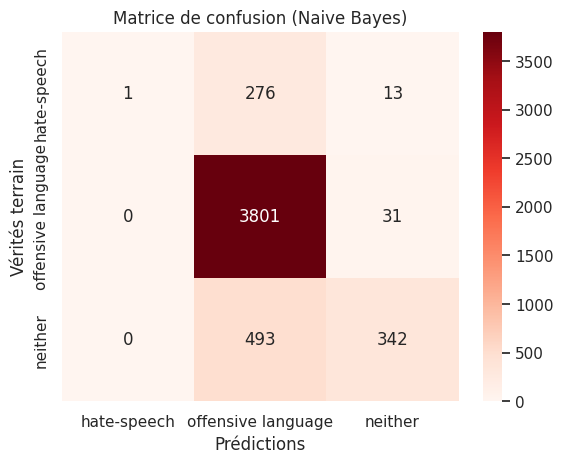

In [246]:
# Matrice de confusion pour Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Reds', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.title('Matrice de confusion (Naive Bayes)')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()

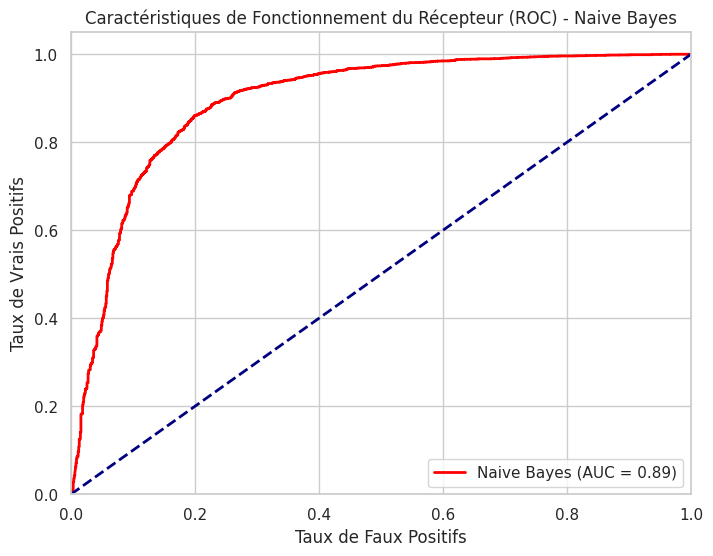

In [260]:
# Tracer la courbe ROC pour Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Caractéristiques de Fonctionnement du Récepteur (ROC) - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [261]:
# Affichage du score ROC-AUC
print(f"ROC-AUC pour Naive Bayes: {roc_auc_nb}")

ROC-AUC pour Naive Bayes: 0.8939193922523776


## d. Comparer les performances de chaque modèle

In [250]:
# Calculer les métriques de performance
metrics = {
    'Model': ['SVM', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_lr, average='weighted'),
        precision_score(y_test, y_pred_nb, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_lr, average='weighted'),
        recall_score(y_test, y_pred_nb, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_nb, average='weighted')
    ]
}

# Ajouter le ROC-AUC aux métriques
metrics['ROC-AUC'] = [roc_auc_svm, roc_auc_lr, roc_auc_nb]

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0                  SVM  0.906395   0.890947  0.906395  0.891797  0.938686
1  Logistic Regression  0.893080   0.875655  0.893080  0.879168  0.939244
2          Naive Bayes  0.835990   0.850717  0.835990  0.794209  0.893919


In [251]:
# Transformer le DataFrame pour un format long
df_metrics_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

In [252]:
# Configurer le style des graphiques
sns.set(style="whitegrid")

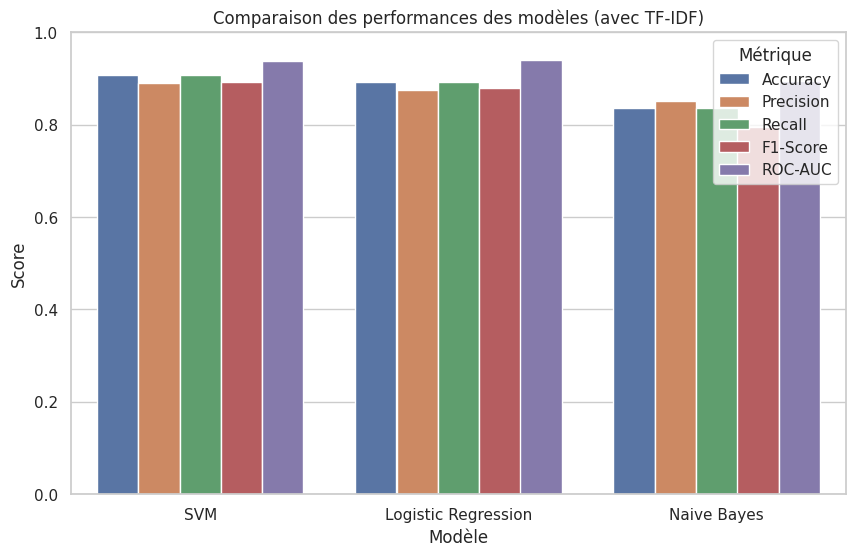

In [253]:
# Tracer le graphique combiné
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_metrics_melted)
plt.title('Comparaison des performances des modèles (avec TF-IDF)')
plt.xlabel('Modèle')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Métrique')
plt.show()

### 1. **Accuracy (Précision globale) :**
- Le **SVM** obtient la meilleure **accuracy** de 0.9064, ce qui signifie qu'il a correctement classé environ 90.64% des tweets dans le test.
- **Régression Logistique** suit de près avec une **accuracy** de 0.8931, soit environ 89.31%, ce qui montre qu'il est légèrement moins performant que le SVM.
- Le **Naive Bayes** a l'accuracy la plus faible de 0.8360 (83.60%), ce qui suggère qu'il commet plus d'erreurs que les deux autres modèles.

### 2. **Précision (Precision) :**
- **SVM** est également le modèle avec la meilleure **précision** (0.8909), ce qui signifie que parmi toutes les prédictions positives qu'il a faites, 89.09% étaient correctes.
- **Régression Logistique** a une précision de 0.8757, légèrement inférieure à celle du SVM.
- **Naive Bayes** a une précision de 0.8507, qui est relativement bonne mais encore en dessous des autres modèles.

### 3. **Rappel (Recall) :**
- Le **SVM** a également le meilleur **rappel** (0.9064), ce qui signifie qu'il identifie correctement 90.64% des véritables tweets positifs (c'est-à-dire des tweets de discours haineux ou offensants).
- La **Régression Logistique** suit avec un **rappel** de 0.8931, ce qui est également très bon, mais inférieur au SVM.
- Le **Naive Bayes** a un **rappel** de 0.8360, ce qui est plus faible que les autres modèles, indiquant qu'il rate davantage de vrais positifs.

### 4. **F1-Score :**
- Le **SVM** a également le meilleur **F1-Score** de 0.8918, ce qui combine bien à la fois la précision et le rappel, montrant un bon équilibre entre ces deux métriques.
- La **Régression Logistique** a un **F1-Score** de 0.8792, légèrement inférieur au SVM, mais toujours très bon.
- Le **Naive Bayes** a un **F1-Score** plus bas (0.7942), ce qui indique un compromis moins favorable entre la précision et le rappel par rapport aux autres modèles.

### 5. **ROC-AUC :**
- **Régression Logistique** a le meilleur score **ROC-AUC** (0.9392), ce qui suggère qu'il est le plus performant lorsqu'on considère la capacité à séparer les différentes classes dans l'ensemble des classes possibles.
- Le **SVM** suit de près avec un score **ROC-AUC** de 0.9387, ce qui est également excellent, indiquant une très bonne capacité à distinguer les classes.
- Le **Naive Bayes**, bien que performant, obtient le score **ROC-AUC** le plus bas (0.8939), ce qui montre qu'il est moins efficace pour distinguer les classes comparé aux autres modèles.

### **Conclusion :**
- Le **SVM** semble être le modèle le plus robuste, avec des scores élevés dans toutes les métriques importantes, ce qui en fait le meilleur choix global dans ce cas particulier.
- **Régression Logistique** se situe juste en dessous du SVM, offrant une performance très proche et est également un bon choix pour la classification des tweets, notamment grâce à son meilleur **ROC-AUC**.
- **Naive Bayes** présente des résultats plus faibles, en particulier pour le **F1-Score** et le **Rappel**, ce qui suggère qu'il pourrait ne pas être aussi bien adapté pour ce type de tâche, surtout en présence de données déséquilibrées ou plus complexes.

## f. Long Short-Term Memory (LSTM)

In [61]:
# Paramètres
max_words = 5000
max_len = 100

In [62]:
# Tokenisation des tweets
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])

In [63]:
# Padding des séquences pour qu'elles aient toutes la même longueur
X = pad_sequences(sequences, maxlen=max_len)

In [64]:
# Conversion des classes en numpy array
y = df['class'].values

In [65]:
# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Forme des données d'entraînement : {X_train.shape}")
print(f"Forme des données de test : {X_test.shape}")

Forme des données d'entraînement : (19826, 100)
Forme des données de test : (4957, 100)


In [66]:
# Paramètres du modèle
embedding_dim = 100

In [67]:
# Construire le modèle LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [68]:
# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 183s 367ms/step - accuracy: 0.8522 - loss: 0.4126 - val_accuracy: 0.9072 - val_loss: 0.2659
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 168s 338ms/step - accuracy: 0.9173 - loss: 0.2438 - val_accuracy: 0.9077 - val_loss: 0.2698
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 177s 289ms/step - accuracy: 0.9426 - loss: 0.1782 - val_accuracy: 0.8986 - val_loss: 0.2999
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 195s 276ms/step - accuracy: 0.9532 - loss: 0.1350 - val_accuracy: 0.8964 - val_loss: 0.3503
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 142s 276ms/step - accuracy: 0.9632 - loss: 0.1126 - val_accuracy: 0.8916 - val_loss: 0.3982
Epoch 6/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 143s 278ms/step - accuracy: 0.9682 - loss: 0.0923 - val_accuracy: 0.8901 - val_loss: 0.4362
Epoch 7/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 140s 275ms/step - accuracy: 0.9723 - loss: 0.0833 - val_accuracy: 0.8908 - val_loss: 0.4861
Epoch 8/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 137s 277ms/step - accuracy: 0.9757 -

In [77]:
# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Perte sur le test: {loss}')
print(f'Précision sur le test: {accuracy}')

155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8796 - loss: 0.7386
Perte sur le test: 0.7670862674713135
Précision sur le test: 0.8775469064712524


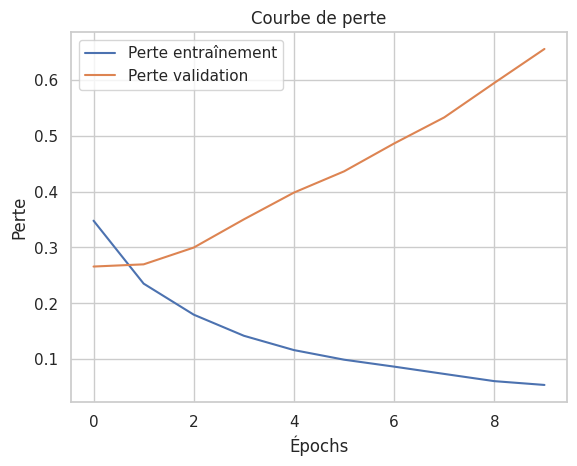

In [80]:
# Courbe de perte
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Courbe de perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

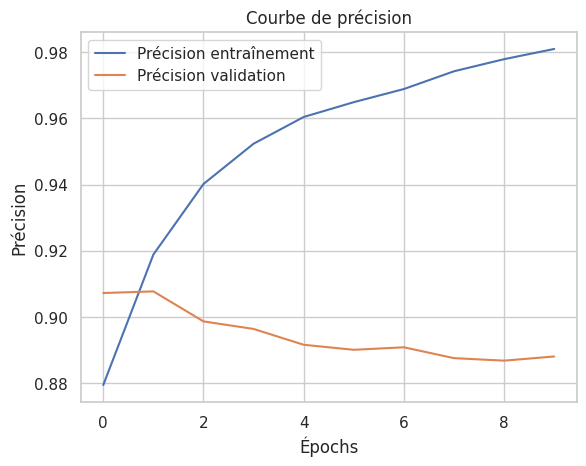

In [81]:
# Courbe de précision
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Courbe de précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [79]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

In [82]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step


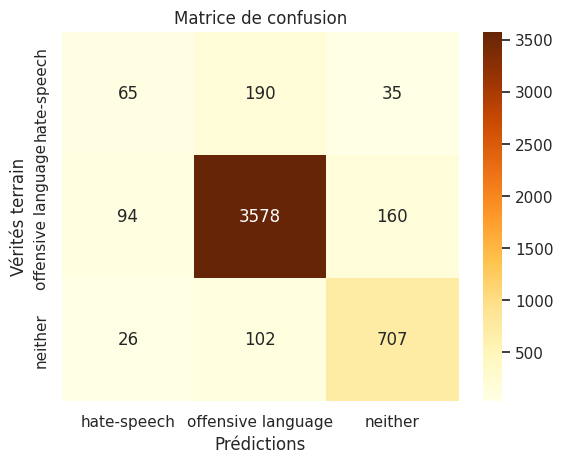

In [88]:
def Conf_matrix_lstm(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr',
                xticklabels=class_mapping.values(),
                yticklabels=class_mapping.values())
    plt.title('Matrice de confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités terrain')
    plt.show()

Conf_matrix_lstm(y_test, y_pred_classes)

# 4. Text Mining avancé

In [177]:
from textblob import TextBlob
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TFBertModel
import torch
from datasets import Dataset, DatasetDict

## a. Sentiment analysis

In [178]:
# Fonction pour analyser le sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [179]:
# Appliquer l'analyse de sentiment
df['sentiment_n'] = df['cleaned_tweet'].apply(get_sentiment)
print(df[['cleaned_tweet', 'sentiment_n']].head())

                                       cleaned_tweet  sentiment_n
0  rt mayasolovely woman shouldnt complain cleani...     0.000000
1  rt mleew boy dat coldtyga dwn bad cuffin dat h...    -0.700000
2  rt urkindofbrand dawg rt sbabylife ever fuck b...    -0.333333
3           rt cganderson vivabased look like tranny     0.000000
4  rt shenikaroberts shit hear might true might f...     0.075000


## b. Modèles basés sur Transformers (BERT)

In [180]:
# Charger le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [181]:
# Tokenizer les tweets
def encode_tweets(tweets):
    return tokenizer(tweets.tolist(), padding=True, truncation=True, return_tensors='pt')

X_train_indices = X_train.nonzero()[0]
X_test_indices = X_test.nonzero()[0]

# Convert to Hugging Face Dataset
train_encodings = encode_tweets(df['cleaned_tweet'].iloc[X_train_indices])
train_labels = y_train[X_train_indices]

train_dataset = Dataset.from_dict({
    **train_encodings,
    'labels': train_labels
})

test_encodings = encode_tweets(df['cleaned_tweet'].iloc[X_test_indices])
test_labels = y_test[X_test_indices]

test_dataset = Dataset.from_dict({
    **test_encodings,
    'labels': test_labels
})

In [183]:
# Fonction pour prétraiter et prédire une seule entrée
def predict_single_input(text):
    # Nettoyer le texte d'entrée
    cleaned_text = preprocess_text(str(text), method="lemmatization")

    # Encoder le texte nettoyé avec le tokenizer BERT
    tokenized_tweet = tokenizer(
        [cleaned_text],
        max_length=128,
        padding=True,
        truncation=True,
        return_tensors='tf'
    )

    # Préparer les entrées pour le modèle BERT
    inputs = {
        'input_ids': tokenized_tweet['input_ids'],
        'attention_mask': tokenized_tweet['attention_mask']
    }

    # Obtenir les embeddings BERT
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')
    bert_output = bert_model(**inputs)
    embedding = bert_output.last_hidden_state[:, 0, :]

    # Prédire en utilisant le modèle entraîné
    with torch.no_grad():
      prediction = model(**{k: torch.tensor(v.numpy()) for k, v in inputs.items()}).logits
    prediction = prediction.detach().numpy()
    predicted_class = prediction.argmax(axis=1)[0]

    # Décoder la classe prédite en une étiquette lisible par l'homme
    predicted_label = class_mapping[predicted_class]

    return predicted_label

# Example usage
text_input = "I hate people who don't look like me, they don't belong here."
predicted_label = predict_single_input(text_input)
print(f"Predicted Label: {predicted_label}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Predicted Label: hate-speech
